* Let install some required tools

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

* We load the data

In [33]:
symbol = ['^FCHI']
data = yf.download(symbol, start='2019-01-01', end='2024-05-05')
data = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


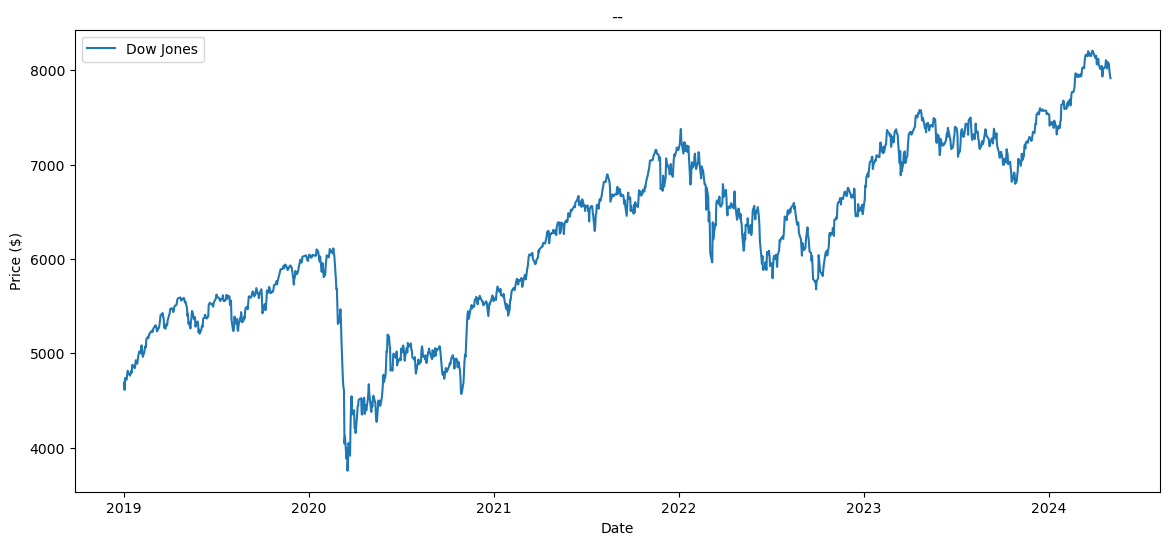

In [34]:
# Ploting
plt.figure(figsize=(14, 6))
plt.plot(data, label='Dow Jones')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

* Data normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

close_prices = data.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

* label

In [36]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


n_steps = 10
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Generate sequence
X, y = create_sequences(scaled_data, n_steps)

# Reshape X to be 3 tensor [sample, time_Step, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

X_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

* Model

In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop

model = Sequential([
    LSTM(50, input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer=RMSprop(), loss="mean_squared_error")
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0799  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015    
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013    
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Ep

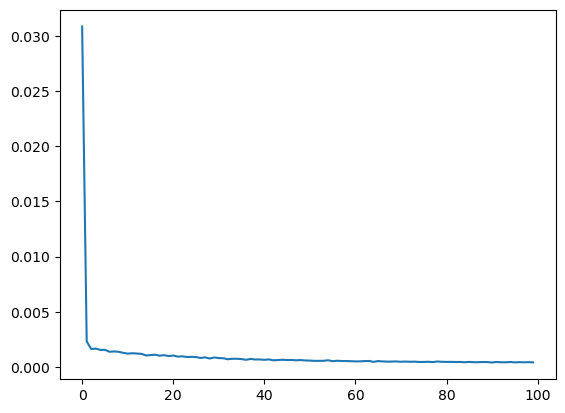

In [38]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.show()

* Prediction

In [39]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_real = scaler.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


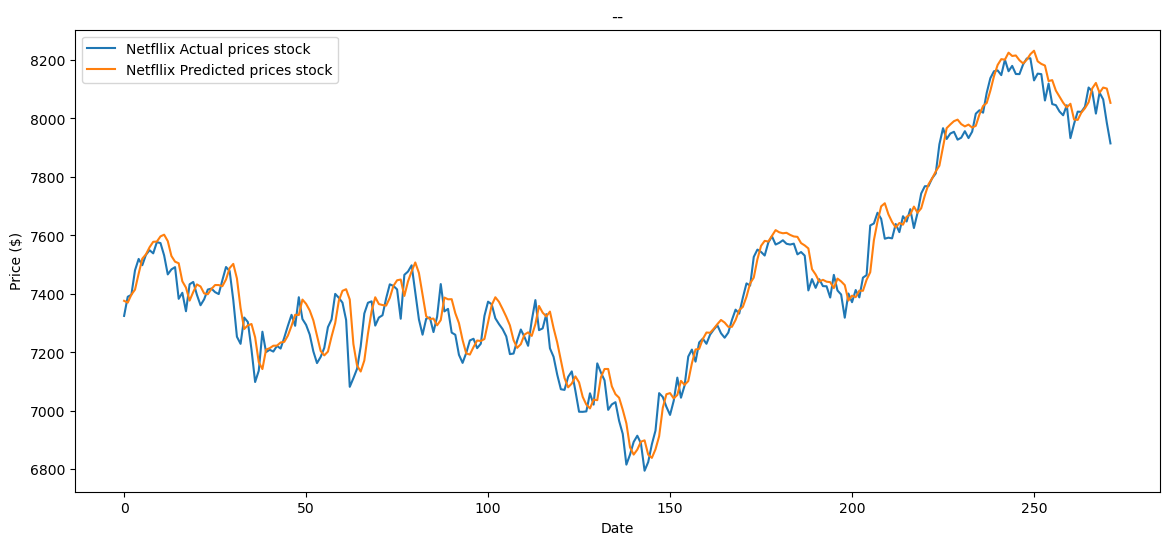

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_real, label='Netfllix Actual prices stock')
plt.plot(predicted_stock_price, label='Netfllix Predicted prices stock')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

* Prediction

In [52]:
recent_stock_price = predicted_stock_price[-n_steps:]
recent_stock_price_scaled = scaler.fit_transform(recent_stock_price)
#recent_stock_price_scaled = recent_stock_price_scaled.reshape(1, recent_stock_price_scaled.shape[0], 1)

tomorrow_prediction = model.predict(recent_stock_price_scaled)
tomorrow_prediction = scaler.inverse_transform(tomorrow_prediction)
print("Current value predicted: ", tomorrow_prediction)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

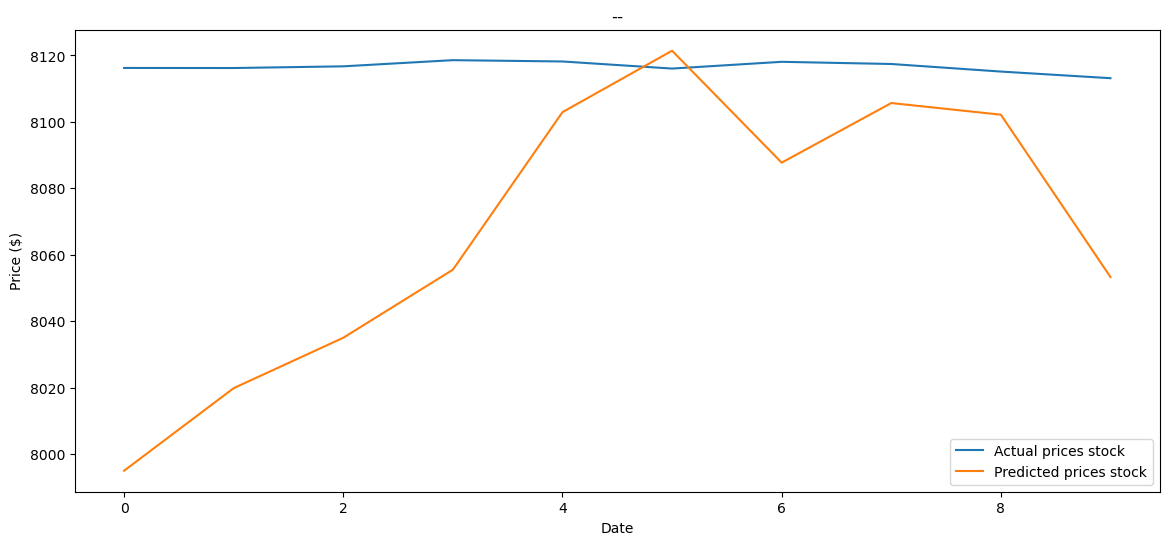

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(scaler.inverse_transform(y[-n_steps:]), label='Actual prices stock')
plt.plot(recent_stock_price, label='Predicted prices stock')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()